Packages

In [1]:
from scipy.optimize import minimize_scalar
from scipy import optimize
import numpy as np 
from types import SimpleNamespace # new? explained below
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
#N = 50 

par = SimpleNamespace()
par.theta = -2
par.p = 0.2
par.y = 1

# 1. Initiliaze vectors of goods and container for utilities
q_values = np.linspace(0,0.9,50)
x_values = np.linspace(0.01,0.9,50)
monetary_loss = np.empty((q_values.shape)) # empty vector with same shape as the vector of coverage and loss


In [3]:
#Utility function
def u(z, par):
    print(par)
    """Utility of assets"""
    return z**(1+par.theta)/(1+par.theta)

In [4]:
#Premium policy
def pi(q, par): 
    print(par)
    """Premium for better coverage"""
    return par.p*q

In [5]:
#Expected utility if not insured
def V0(x, par): 
    print(par)
    """Expected utility of a non-insured agent"""
    return par.p*u(par.y-x, par) + (1-par.p)*u(par.y, par)

In [6]:
#Expected utility function if insured
def V(q, x, par): 
    print(par)
    """Expected utility of an insured agent"""
    u_loss = u(par.y-x+q-pi(q, par), par)
    u_win = u(par.y-pi(q, par), par)
    return par.p*u_loss+(1-par.p)*u_win

In [7]:
def qstar(q, x, par): 
    obj = lambda x: -V(q, x, par)
    #x should be from 0.0-0.9
    result = optimize.minimize_scalar(obj,bounds=(0,1),method='bounded')
    q = result.x
    return q #want to return a float not an array

#qs = qstar(np.round(q_values,2), np.round(x_values,2), par)

#print(f'qstar = {np.round(q_values,2)}') #<-- doing this works
#print(f'qstar = {np.round(qstar(q_values,x_values,par),2)}') 

#print(f'qstar({np.round(x_values,2)}, {np.round(q_values,2)}, {par}')

#print(f'qstar = {q_values:.2f}') <-- This does not work before after running the whole notebook, not printing 

In [10]:
#coverage = qstar(q_values,x_values,par)
#print(coverage)

* Cannot print the result for one qstar

In [ ]:
#qs = qstar(q_values, x_values, par) #<-- This does not work before after running the whole notebook, not printing 
#print(qs) # qstar = 5.9608609865491405e-06

In [ ]:
# 2. Calculate every q* for all x's by looping
for i, (q_values, x_values) in enumerate(zip(q_values, x_values)):
    # i. Calculate insurance coverage for every loss
    insurance_coverage = qstar(q_values, x_values, par)
    
    # ii. Append monetary loss to empty vector
    monetary_loss[i] = insurance_coverage
    
    # iii. Print result
    print(f'qstar({np.round(q_values,2)}, {np.round(x_values,2)}, par) = {np.round(monetary_loss[i],2)}, where par = {par}')

## Plotting the x's and q*

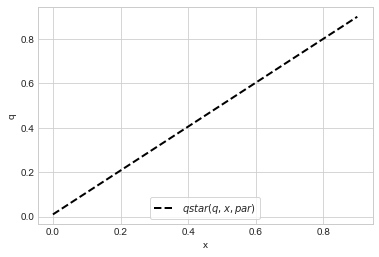

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(q_values,x_values,ls='--',lw=2,color='black',label='$qstar(q,x,par)$')
#ax.plot(q_values, np.round(monetary_loss,2),ls='',marker='s',label='best')

ax.set_xlabel('x')
ax.set_ylabel('q')
ax.legend(loc='lower center',frameon=True);